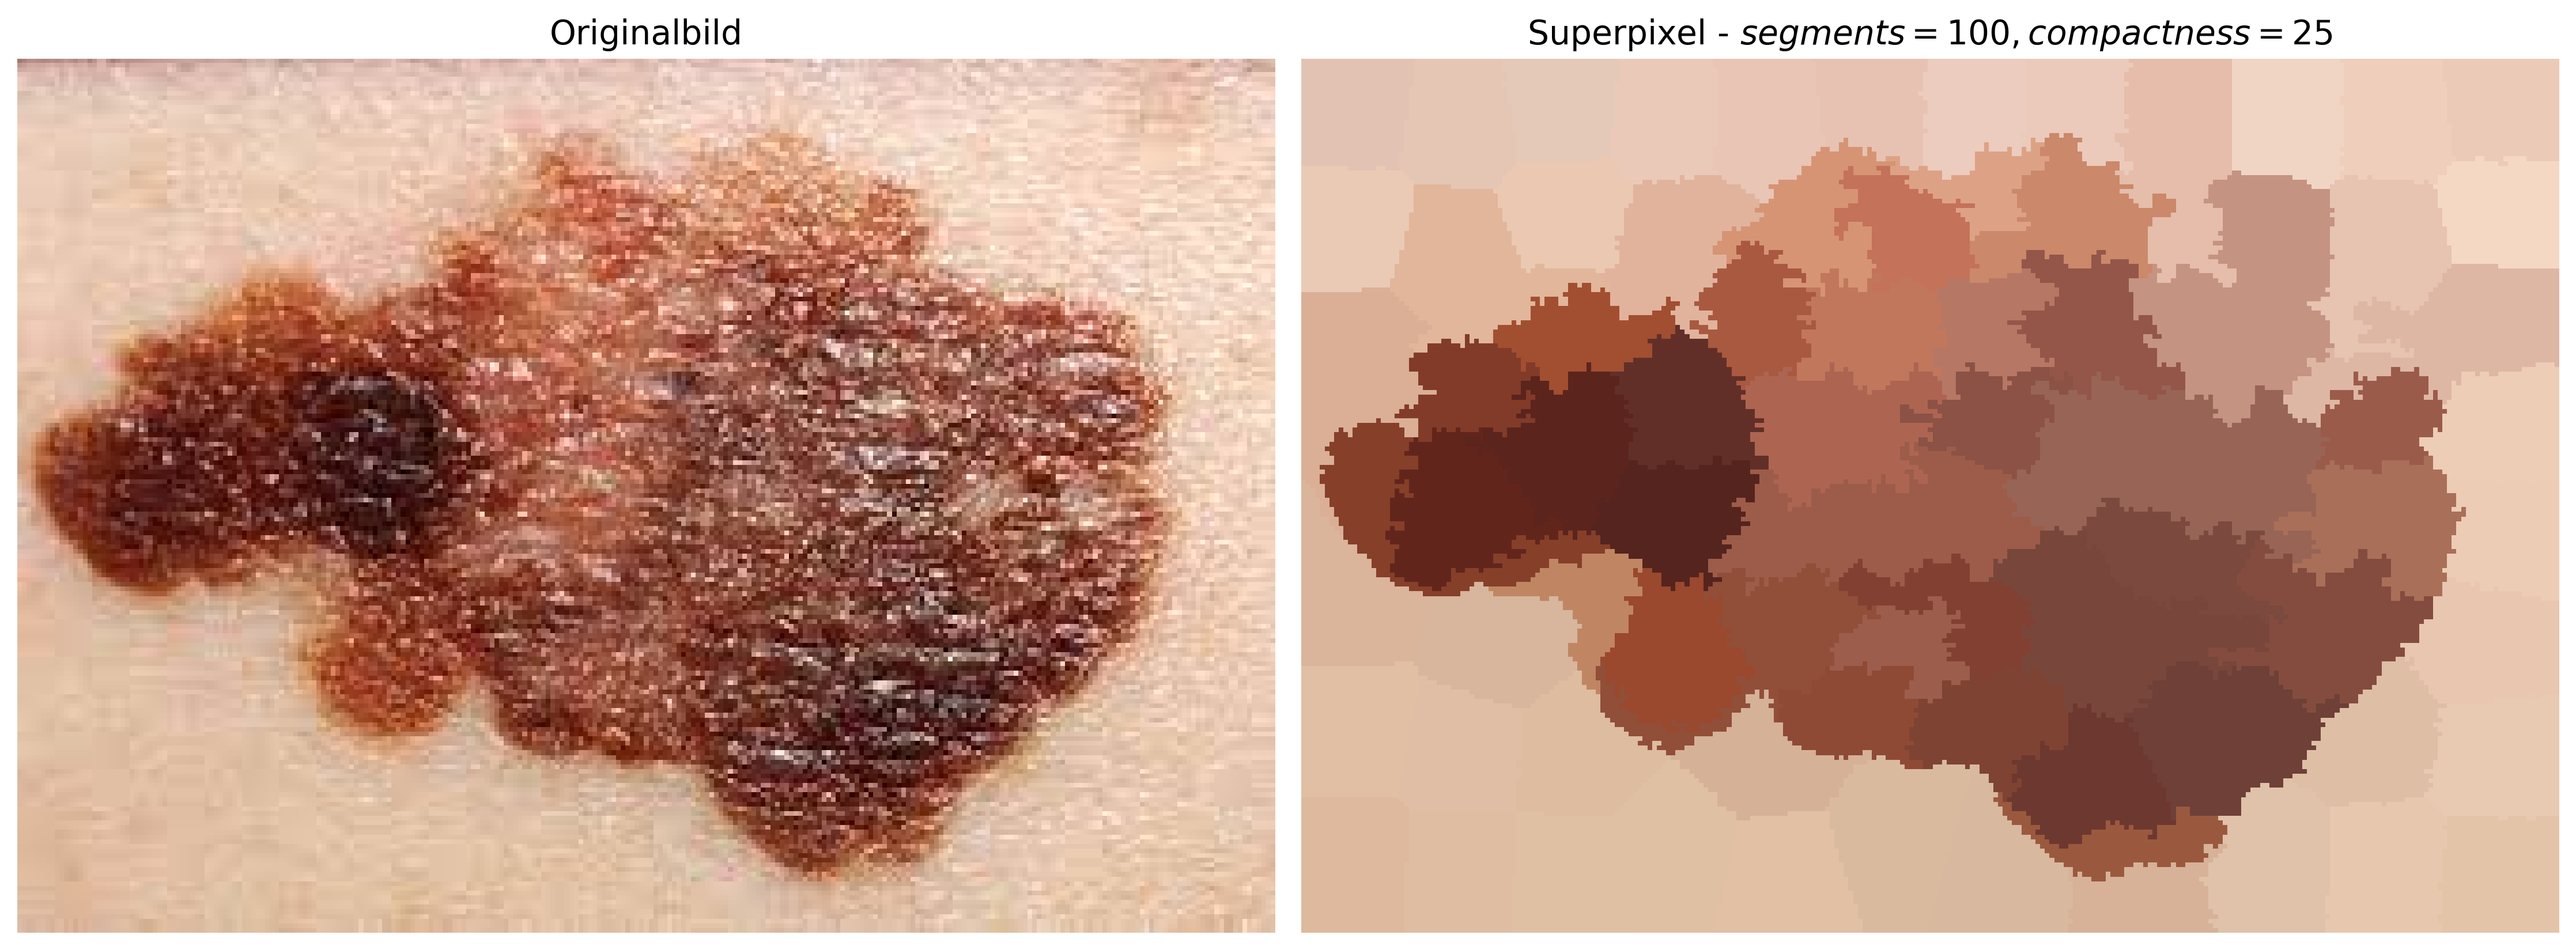

In [13]:
from skimage import color
from skimage import io
from skimage.segmentation import slic, mark_boundaries
from skimage.color import label2rgb
import matplotlib.pyplot as plt

# Bild laden
image = io.imread('tester.jpg')

# Bild in Lab-Farbraum konvertieren
image_lab = color.rgb2lab(image)

n_segments = 100
compactness = 25
# Superpixel-Segmentierung durchführen
segments = slic(image_lab, n_segments, compactness, start_label=1)

# Segmentierungsergebnisse visualisieren
fig, ax = plt.subplots(1, 2, figsize=(15, 8), dpi=300)

# Originalbild anzeigen
ax[0].imshow(image)
ax[0].set_title('Originalbild', fontsize=14)
ax[0].axis('off')

# Superpixel-Bild anzeigen
ax[1].imshow(label2rgb(segments, image, kind='avg'))
ax[1].set_title('Superpixel - $segments = %d, compactness = %d$' % (n_segments, compactness), fontsize=14)
ax[1].axis('off')

plt.tight_layout()
plt.show()


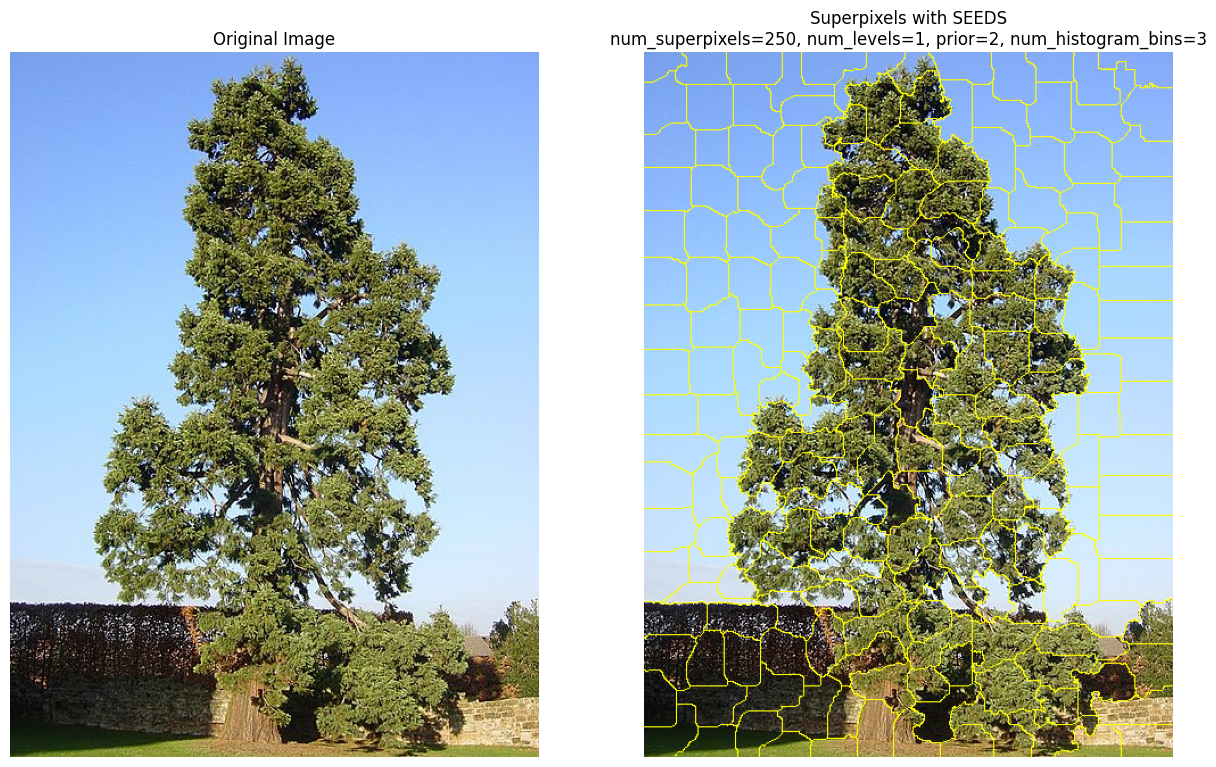

In [5]:
# Importiere die notwendigen Bibliotheken
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lade das Bild
image_path = 'Baum.jpg'  # Pfad zu deinem Bild
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Konvertiere das Bild in den LAB-Farbraum
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Initialisiere die SEEDS-Superpixel-Segmentierung
num_superpixels = 250  # Anzahl der gewünschten Superpixel
num_levels = 1  # Anzahl der Ebenen
prior = 2  # Balance zwischen Farb- und Kontur-Information
num_histogram_bins = 3  # Anzahl der Histogramm-Bins

seeds = cv2.ximgproc.createSuperpixelSEEDS(
    image.shape[1], image.shape[0], image.shape[2],
    num_superpixels, num_levels, prior, num_histogram_bins
)

# Wende SEEDS-Superpixel-Segmentierung an
seeds.iterate(image_lab, num_iterations=10)

# Erhalte die Labels der Superpixel
labels = seeds.getLabels()

# Zeichne die Konturen der Superpixel auf das Bild
mask = seeds.getLabelContourMask(False)
contours = image_rgb.copy()
contours[mask == 255] = [255, 255, 0]  # Zeichne die Konturen in Rot


# Zeige das Originalbild und das Bild mit Superpixel-Konturen
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

title_params = f'Superpixels with SEEDS\nnum_superpixels={num_superpixels}, num_levels={num_levels}, prior={prior}, num_histogram_bins={num_histogram_bins}'
ax[1].imshow(contours)
ax[1].set_title(title_params)
ax[1].axis('off')

plt.show()


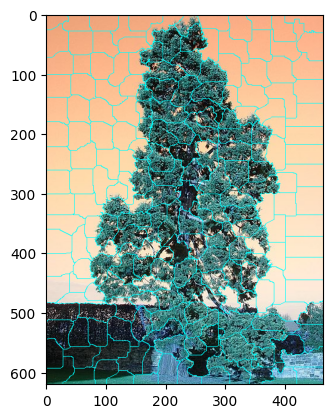

In [1]:
# Importiere die notwendigen Bibliotheken
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_superpixels(image, num_superpixels=250, num_levels=1, prior=2, num_histogram_bins=3):
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

  seeds = cv2.ximgproc.createSuperpixelSEEDS(
      image.shape[1], image.shape[0], image.shape[2],
      num_superpixels, num_levels, prior, num_histogram_bins
  )
  # Wende SEEDS-Superpixel-Segmentierung an
  seeds.iterate(image_lab, num_iterations=10)

  # Erhalte die Labels der Superpixel
  labels = seeds.getLabels()

  # Zeichne die Konturen der Superpixel auf das Bild
  mask = seeds.getLabelContourMask(False)
  contours = image_rgb.copy()
  contours[mask == 255] = [255, 255, 0]  # Zeichne die Konturen in Rot
  return contours

def apply_superpixels_to_dataset(dataset, num_superpixels=250, num_levels=1, prior=2, num_histogram_bins=3):
  segmented_images = []
  for i, image in enumerate(dataset):
      if image.ndim != 3 or image.shape[2] != 3:
          raise ValueError(f"Bild {i} hat unerwartete Dimensionen: {image.shape}")
      segmented_image = apply_superpixels(image, num_superpixels=num_superpixels, num_levels=num_levels, prior=prior, num_histogram_bins=num_histogram_bins)
      segmented_images.append(segmented_image)
  return np.array(segmented_images)


# Lade das Testbild
image = cv2.imread('Baum.jpg')
BAUM=apply_superpixels(image)
plt.imshow(cv2.cvtColor(BAUM, cv2.COLOR_BGR2RGB))
plt.show()